In [1]:
import numpy as np 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

### Linear Regression

Let us first start with a simple linear regression in 1 dimension. So that we can visualize. The annoying thing is that scikit learn will take input values of shape (n, 1) but when we plot them in matplotlib, we have to reshape them as (n, ). 

0.9911434922728639
[3.38904802] -0.3865108545648497


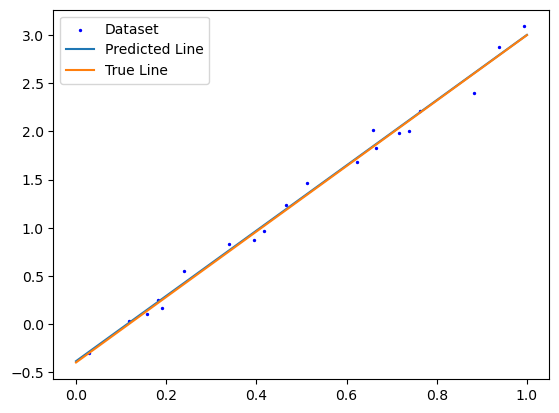

In [44]:
N = 20 
X = np.random.uniform(0, 1, size=(20, 1))
Y = np.dot(X, np.array([3.4])) - 0.4 + np.random.normal(0, 0.1, size=20) 

plt.scatter(X.reshape(-1), Y, c="b", s=2, label="Dataset") 

model = LinearRegression().fit(X.reshape(-1, 1), Y) 

x_ran = np.linspace(0, 1, 100)
y_ran = model.predict(x_ran.reshape(-1, 1))
print(model.score(X, Y)) 
print(model.coef_, model.intercept_)


plt.plot(x_ran, y_ran, label="Predicted Line")
plt.plot(x_ran, 3.4 * x_ran - 0.4, label="True Line")
plt.legend()
plt.show() 



Now let's run linear regression with multiple input values. 

In [45]:
n = 100
d = 6
X = np.random.uniform(0., 1., size=(n, d))                         # X is 20x2 matrix 
Y = np.dot(X, np.array([0.45, -0.35, 1.4, -0.9, 4.1, 2.6])) - 2 + np.random.normal(0, 0.1, size=n) # Y is 1x20 matrix
print(X.shape, Y.shape)

model = LinearRegression().fit(X, Y)  
print(model.score(X, Y)) 
print(model.coef_, model.intercept_)

(100, 6) (100,)
0.9962302562224499
[ 0.44256305 -0.3554644   1.39016734 -0.89699893  4.05606798  2.6507996 ] -1.9791905623623283


#### Regularized Least Squares 

In [50]:
from sklearn.linear_model import Ridge, Lasso 

ridge_model = Ridge(alpha=1.0).fit(X, Y) 
print(f"Ridge Score: {ridge_model.score(X, Y)}")
print(ridge_model.coef_, ridge_model.intercept_)

# lasso_model = Lasso(alpha=1.0).fit(X, Y) 
# print(f"Ridge Score: {lasso_model.score(X, Y)}")
# print(lasso_model.coef_, lasso_model.intercept_)



Ridge Score: 0.6805005428375369
[ 0.17076483 -0.03948177  0.79170824 -0.28328752  1.71079958  1.136518  ] -0.07979962713522482


### Polynomial Regression

In [4]:
from sklearn.preprocessing import PolynomialFeatures 

# Why is polynomial featuers in preprocessing? 
# This is because we need to take powers of the inputs X and 
# now this reduces basically to multilinear regression

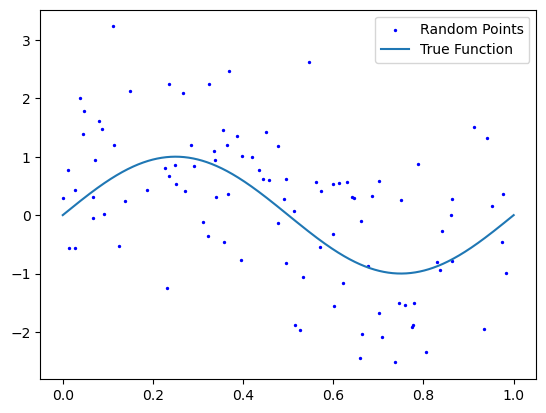

In [37]:
X = np.random.uniform(0., 1., size=100).reshape(-1, 1) 
Y = np.sin(2 * np.pi * X.reshape(-1)) + np.random.normal(0., 1., size=100) 

range = np.linspace(0, 1, 1000) 
plt.scatter(X, Y, c="b", s=2, label="Random Points") 
plt.plot(range, np.sin(2 * np.pi * range), label="True Function")
plt.legend() 
plt.show() 

In [43]:

model = PolynomialFeatures(degree=3) 
# You transform the x values by taking subsequent powers of them 
X_poly = model.fit_transform(X)

# Now you perform linear regression on the transformed inputs 
line = LinearRegression() 
line.fit(X_poly, Y) 
print(line.coef_)


[  0.           9.18012369 -29.56013375  20.35725241]


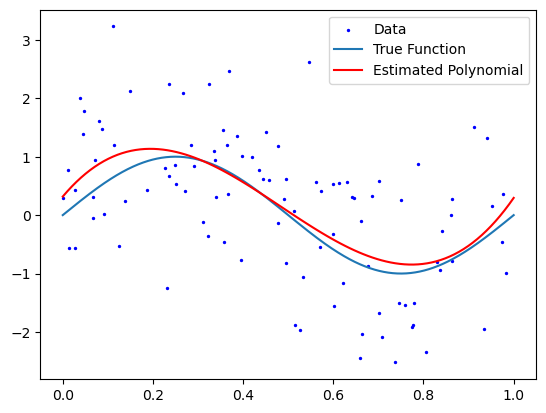

In [44]:
linspace = np.linspace(0, 1, 100) 
prediction = line.predict(model.fit_transform(linspace.reshape(-1, 1)))  

plt.scatter(X.reshape(-1), Y, c="b", s=2, label="Data") 
plt.plot(range, np.sin(2 * np.pi * range), label="True Function")
plt.plot(linspace, prediction, c="r", label="Estimated Polynomial")
plt.legend() 
plt.show()